# Project Electromagnetism V2021

In this jupyter file the laplaces equation $\nabla^2 V = 0$ will be solved with the boundaries grounded and tho columns in the grid held at a constant value. This differential equation will be solved with an iterative method for solving linear equations, with the help of formulating the differential operator with finite differences.

###### Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt

###### Constants

In [7]:
N = 2*100
L = 1
length = 1

###### Functions

In [19]:
# def create_2_capacitors(d,length = 1):
#     Ny = int(length/L)*N
#     capacitor = np.linspace(-length/2,length/2,Ny)
#     Nx = int(d/L)*N
#     x0 = np.zeros(Ny)
#     x0.fill(d/2)
#     capacitors = np.array([[-1*x0,capacitor],[x0,capacitor]])
#     return capacitors

def create_capacitors(grid,d = 0.5):
    Ny = int(length/L*N/4)
    Nx = int(d/L*N/4)
    for i in range(N):
        if i == (N//2-Nx) or i == (N//2+Nx):
            V = 0
            if i == (N//2-Nx):
                V = 1
            else:
                V = -1
            if V != 0:
                for j in range(0,N):
                    if N//2 - Ny <= j <= N//2 + Ny:
                        grid[i][j] = V
    return grid

def Laplace_solver(V0,d = 0.5):#2D solver
    Ny = int(length/L*N/4)
    Nx = int(d/L*N/4)
    ystart,ystop = N//2 - Ny,N//2 + Ny
    x1,x2 = (N//2-Nx),(N//2+Nx)
    
    
    V = V0
#     for i in range(M):
#         V[1:N-1,1:N-1] = (V[2:,1:N-1] + V[:N-2,1:N-1] + V[1:N-1,2:] + V[1:N-1,0:N-2])/4
#         V[x1,ystart:ystop] = 1 #Forcing the capacitor voltage to be maintained at 1 and -1 respectable
#         V[x2,ystart:ystop] = -1
    count,limit,tol,error = 0, 500, 1e-8, 10
    while error > tol and count<limit:
        V0 = np.copy(V)
        V[1:N-1,1:N-1] = (V[2:,1:N-1] + V[:N-2,1:N-1] + V[1:N-1,2:] + V[1:N-1,0:N-2])/4
        V[x1,ystart:ystop] = 1 #Forcing the capacitor voltage to be maintained at 1 and -1 respectable
        V[x2,ystart:ystop] = -1
        error = np.linalg.norm(V-V0)
        count +=1
        V0 = np.copy(V)
        
        
    return V

def E_field(V):
    delta = L/N
    Ex = -(V[1:N-1,2:N]-V[1:N-1,0:N-2])
    Ey = -(V[2:N,1:N-1]-V[0:N-2,1:N-1])
    
#     Ex[np.abs(Ex) > 0.01] = np.nan
#     Ey[np.abs(Ey) > 0.01] = np.nan
    return Ex/delta,Ey/delta



###### a)

The strategi to solve this tast will be to make a grid with all boundaries $V = 0$ and the points with coordinates which corresponds to a capacitor plate equaling to +1V or -1V respectably. The Jacobi iteration method with numpy array slicing for efficiency will then be used with some low tolleranse, with the caviat that capacitor plates er controlled to be at the right values every iteration

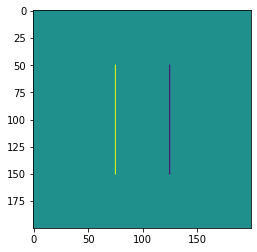

In [9]:
grid = np.zeros((N,N))

new_grid = create_capacitors(np.copy(grid))
plt.imshow(np.transpose(new_grid)) #rows are xs, and column are ys, in numpy arrays. This must be corrected for in plots.

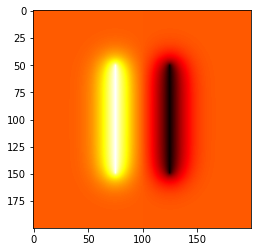

In [16]:
V = Laplace_solver(np.copy(new_grid))
plt.imshow(np.transpose(V),cmap = "hot")


###### b) 

We insert the solutiongrid of the potential into the E_field function that calculates its gradient with double step finite dfferences. 

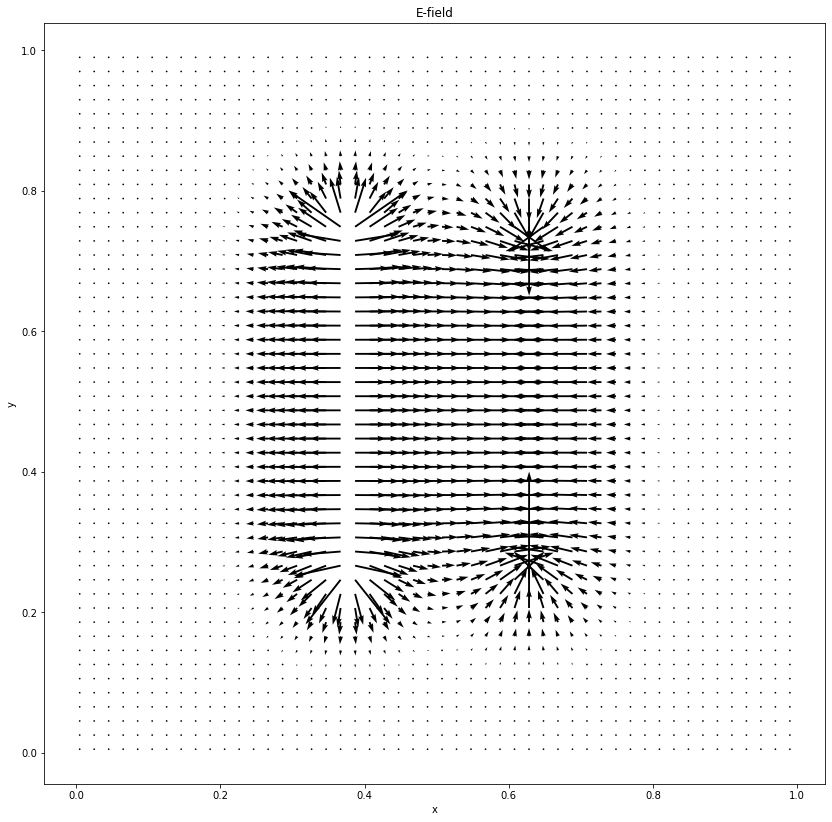

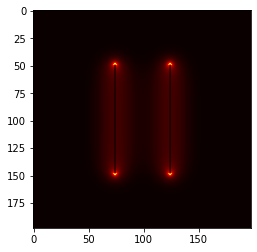

In [23]:
Ex,Ey = E_field(np.transpose(V))
scaling = 50
xs = ys = np.linspace(0,L,N)[1:N-1:N//scaling]

fig, ax = plt.subplots(figsize = (14,14))

ax.title.set_text("E-field")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.quiver(xs,ys,Ex[::N//scaling,::N//scaling],Ey[::N//scaling,::N//scaling],scale = 500)

plt.figure("heatmap of absolute")
plt.imshow(Ex**2 + Ey**2,cmap = "hot")

###### c)

We make a list of d values ranging from 0.01 to 1.0, an intervall that shows some different behaviours. We then use the same functions and method as earlyer, but with a grid for each different separation from the list. This gives us one solution for each value of d, and we plot thee coordinate (0,0.6) in each of them. In our indexing, with [0,N] corresponding to [-1,1], the point (0,0 + 0.6) is written with the index [N/2,N/2 + 3N/10]

In [ ]:
ds = np.linspace(0.01,1.0,20)
new_grids = np.array([create_capacitors(np.copy(grid),ds[i]) for i in range(len(ds))])
Vs = [Laplace_solver(np.copy(new_grids[i]),ds[i]) for i in range(len(new_grids))]
Es = [E_field(Vs[i]) for i in range(len(Vs))]

Es = [np.sqrt(Es[i][0][N//2][N//2 + 3*N//10]**2 + Es[i][1][N//2][N//2 + 3*N//10]**2) for i in range(len(Es))]

plt.plot(ds,Es)

Our modell is a 2D modell, which means the capacitor plates are treates as lines. This means that the electric fields generated are proportional to 1/r where r is the distance from a given and the plate. Due to this, our solution generated also depends on distance r between a point and a plate. This will give us qualitativly different bevavior from the real 3D case, which points between the plates far enough from the edges all will have approximatly the same electric field. 